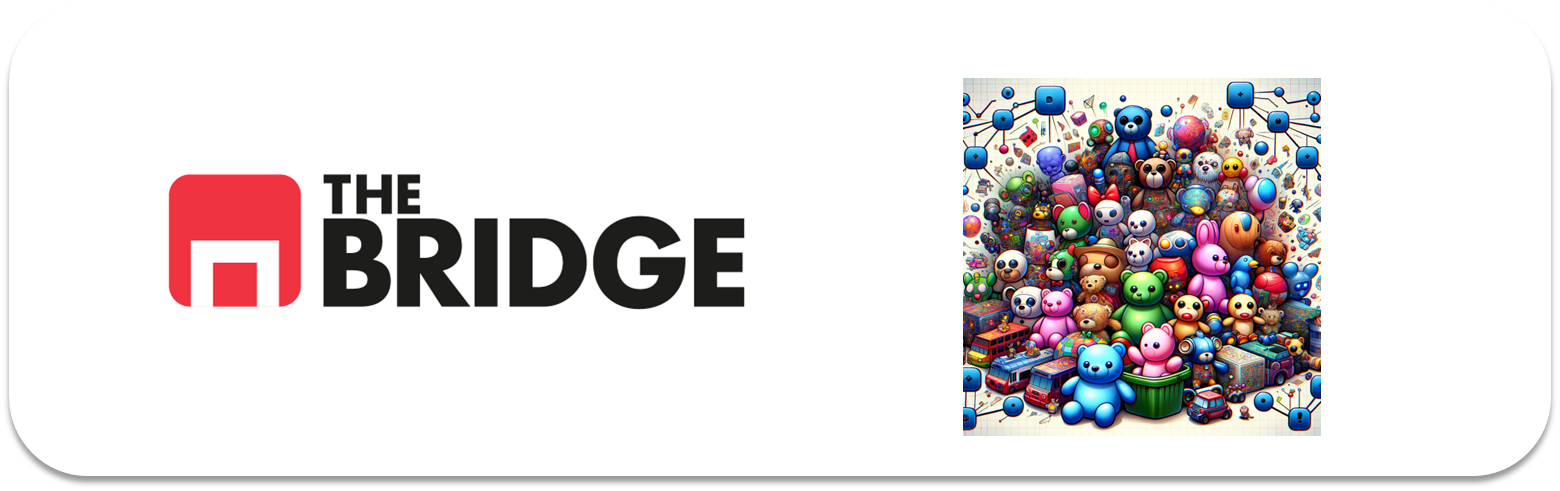

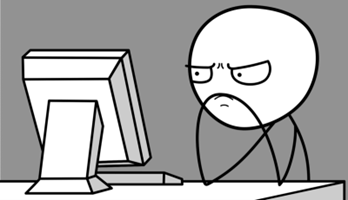

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [32]:
data = pd.read_csv('./data/empowering_drinks.csv', sep="|")

data.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [34]:
data.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


In [35]:
#Vamos a añadir una columna con la kurtosis para ver si los datos se asemajan a una distribución normal
descipcion = data.describe()
kurtosis = data.kurtosis()
descipcion.loc['kurtosis'] = kurtosis

descipcion

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870
kurtosis,-0.944019,1.467838,-0.944240,-0.413939,-0.198109


In [36]:
np.abs(data.corr()).style.background_gradient(cmap='coolwarm')

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
Azúcares,1.000000,0.174354,0.258166,0.672969,0.553245
Vitamínas del grupo B,0.174354,1.000000,0.155276,0.208444,0.215869
Cafeína,0.258166,0.155276,1.000000,0.497329,0.124157
Ácido Cítrico,0.672969,0.208444,0.497329,1.000000,0.408325
Taurina,0.553245,0.215869,0.124157,0.408325,1.000000


No hay una correlacion excesiva entre variables. Vamos a dibujar los scatterplot 2 a 2 para ver si se pueden visualizar clusters

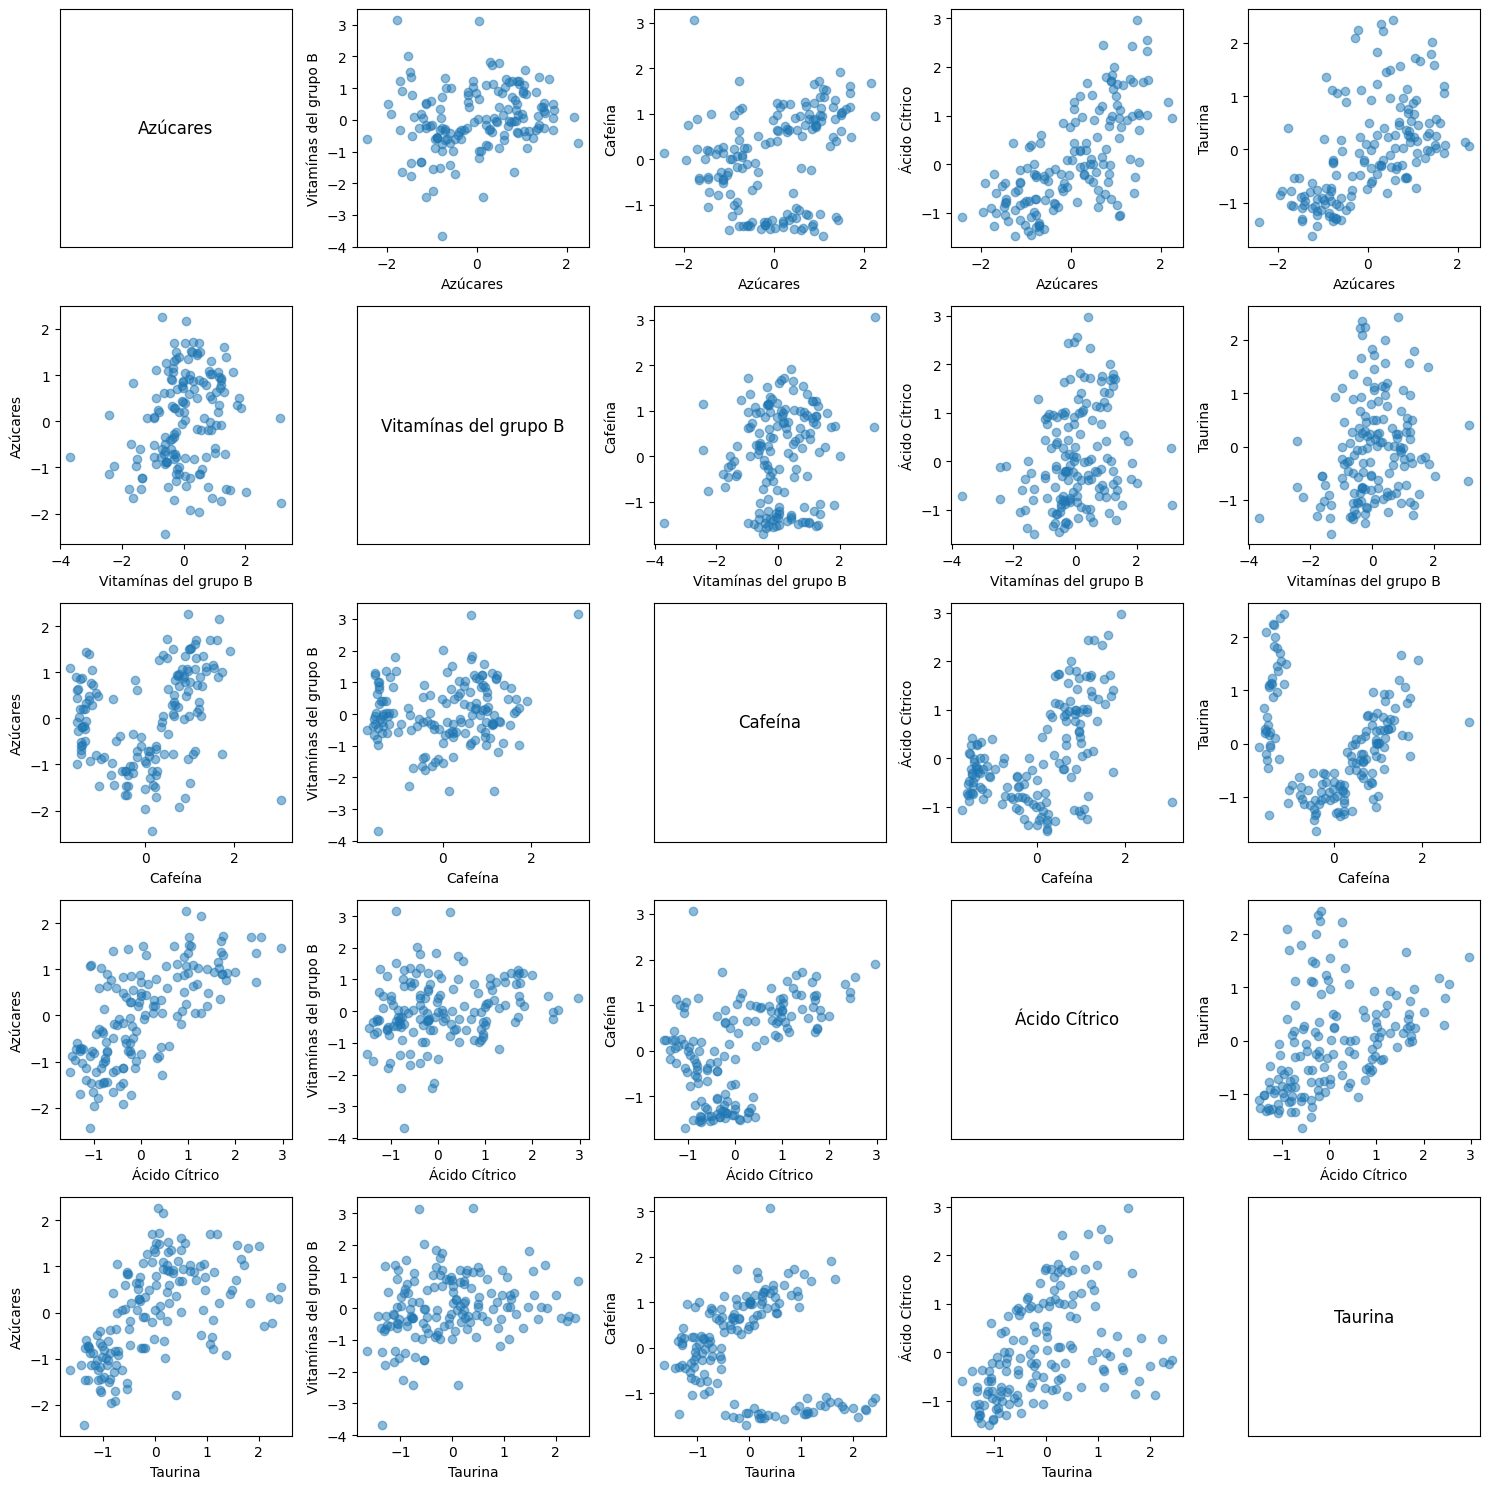

In [37]:
columns = data.columns

fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(15, 15))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i != j:
            axes[i, j].scatter(data[col1], data[col2], alpha=0.5)
            axes[i, j].set_xlabel(col1)
            axes[i, j].set_ylabel(col2)
        else:
            axes[i, j].text(0.5, 0.5, col1, horizontalalignment='center', verticalalignment='center', fontsize=12)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

Viendo los gráficos anteriores, la variable "Vitaminas del grupo B" parece que forma agrupaciones con las demás variables pero de forma poco marcada (con "Azúcares" y "Cafeína").   
Si tuviesemos que descartar una variable, eliminariamos esta. Por el momento vamos a mantenerla

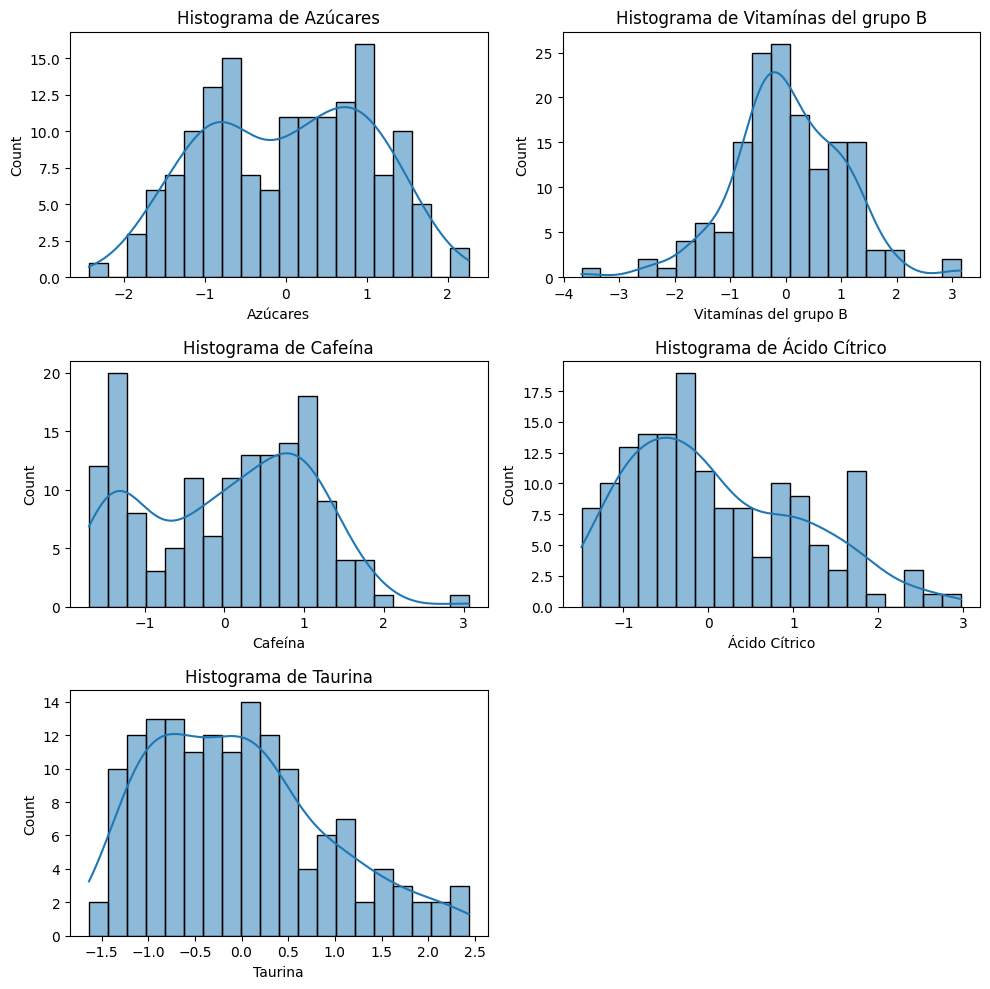

In [38]:
fig, axes = plt.subplots(nrows=len(columns)//2 + len(columns)%2, ncols=2, figsize=(10, 10))

for i, col in enumerate(columns):
    row = i // 2
    col_idx = i % 2
    sns.histplot(data[col], ax=axes[row, col_idx], kde=True, bins = 20)
    axes[row, col_idx].set_title(f'Histograma de {col}')

if len(columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

Los datos parecen tener una escala similar, pero no siguen una distribución 100% normal. Vamos a escalarlos usando StandardScaler

In [39]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


Se va a crear un modelo con DBSCAN que cumpla que:

1. El sillhouete score tiene que ser el más alto
2. El número de clústers debe estar entre 3 y 5
3. El número de anomalías tiene que ser inferior al 10%

In [40]:
from sklearn.metrics import silhouette_score

#Creamos el rango de hipermarametros
eps_range = np.arange(0.1, 3, 0.1)
min_samples_range = range(2, 20)

#Inicializamos las variables para almacenar los mejores valores
best_eps = None
best_min_samples = None
best_model = None
best_silhouette_score = -1
best_num_clusters = 0

#Iteramos sobre los valores de eps y min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data_scaled)
        
        labels = dbscan.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        #Solo evaluamos modelos con el número de clusters entre 3 y 5
        if 3 <= num_clusters <= 5:
            silhouette_avg = silhouette_score(data_scaled, labels)
            
            if silhouette_avg > best_silhouette_score:
                best_eps = eps
                best_min_samples = min_samples
                best_model = dbscan
                best_silhouette_score = silhouette_avg
                best_num_clusters = num_clusters

print(f"Mejor eps: {best_eps}")
print(f"Mejor min_samples: {best_min_samples}")
print(f"Mejor número de clusters: {best_num_clusters}")
print(f"Mejor Silhouette Score: {best_silhouette_score}")

#Entrenamos el modelo con los mejores hiperparámetros y colocamos las etiquetas en el dataframe
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(data_scaled)

data_scaled['DBSCAN_Labels'] = dbscan.labels_

data_scaled.head()

Mejor eps: 1.2000000000000002
Mejor min_samples: 9
Mejor número de clusters: 3
Mejor Silhouette Score: 0.35433673982586


,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,DBSCAN_Labels
0,1.465925,0.196207,0.957824,0.927289,0.317612,0
1,0.221992,-0.871612,0.667526,0.879813,-0.267608,0
2,0.173684,1.079919,1.132002,1.307094,0.336190,0
3,1.635003,0.453956,1.373917,2.240782,1.320844,0
4,0.270301,1.816346,0.599790,-0.117176,-0.295475,-1


Pasamos ahora a verlo con clustering jerárquico

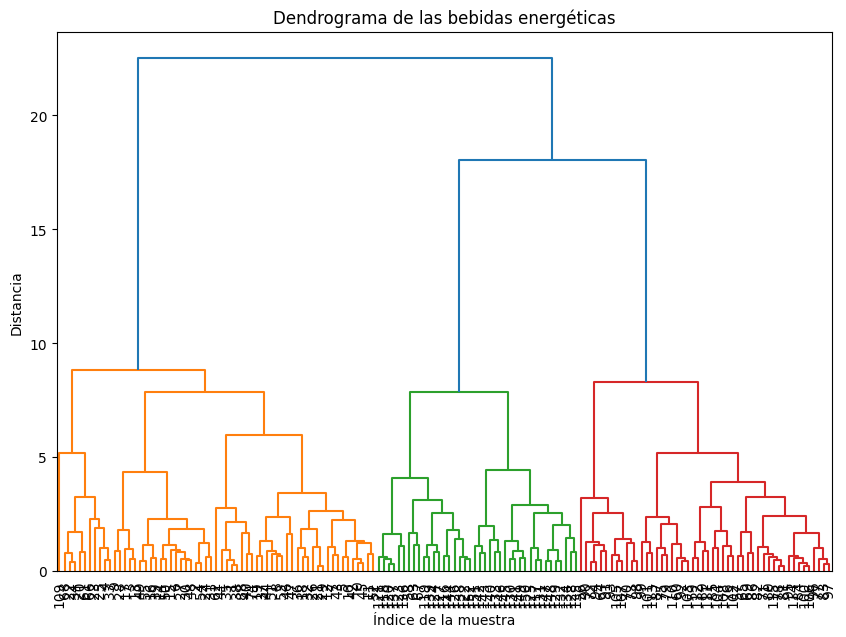

In [41]:
#Generamos el linkage
link = linkage(data_scaled.drop(columns=['DBSCAN_Labels']), method='ward')

#Visualizamos el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(link, labels=data_scaled.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de las bebidas energéticas')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()

Viendo el dendrograma, podemos distinguir claramente 3 clusteres, que cuadra con lo que nos pide el ejercicio. Vamos a iterar de todas formas para ver   
que modelo nos da el mejor coeficiente de silueta

In [42]:
from sklearn.metrics import silhouette_score

#Inicializamos las variables para almacenar los mejores valores
best_n_clusters = None
best_model = None
best_silhouette_score = -1

#Iteramos sobre el rango de clusters
for n_clusters in range(3, 6):
    jerarquico = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = jerarquico.fit_predict(data_scaled.drop(columns=['DBSCAN_Labels']))
    
    silhouette_avg = silhouette_score(data_scaled.drop(columns=['DBSCAN_Labels']), labels)
    
    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_model = jerarquico
        best_silhouette_score = silhouette_avg

print(f"Mejor número de clusters: {best_n_clusters}")
print(f"Mejor Silhouette Score: {best_silhouette_score}")

#Entrenamos el modelo con el mejor número de clusters y colocamos las etiquetas en el dataframe
data_scaled['Hierarchical_Labels'] = best_model.fit_predict(data_scaled.drop(columns=['DBSCAN_Labels']))

data_scaled.head()

Mejor número de clusters: 3
Mejor Silhouette Score: 0.37646936486414423


,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,DBSCAN_Labels,Hierarchical_Labels
0,1.465925,0.196207,0.957824,0.927289,0.317612,0,0
1,0.221992,-0.871612,0.667526,0.879813,-0.267608,0,0
2,0.173684,1.079919,1.132002,1.307094,0.336190,0,0
3,1.635003,0.453956,1.373917,2.240782,1.320844,0,0
4,0.270301,1.816346,0.599790,-0.117176,-0.295475,-1,0


Los coeficientes de silueta son en general bajos. Vamos a ver si el modelo mejora eliminando la variable "Vitaminas del grupo B", que parecía no aportar información   
a la hora de generar clústers

In [43]:
#Eliminar la variable "Vitamínas del grupo B" del dataset escalado
data_scaled_new = data_scaled.drop(columns=['Vitamínas del grupo B'])

#Creamos de nuevo el modelo con DBSCAN
best_eps = None
best_min_samples = None
best_model = None
best_silhouette_score = -1
best_num_clusters = 0

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data_scaled_new)
        
        labels = dbscan.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        if 3 <= num_clusters <= 5:
            silhouette_avg = silhouette_score(data_scaled_new, labels)
            
            if silhouette_avg > best_silhouette_score:
                best_eps = eps
                best_min_samples = min_samples
                best_model = dbscan
                best_silhouette_score = silhouette_avg
                best_num_clusters = num_clusters
print("MODELO DBSCAN:")
print(f"Mejor eps: {best_eps}")
print(f"Mejor min_samples: {best_min_samples}")
print(f"Mejor número de clusters: {best_num_clusters}")
print(f"Mejor Silhouette Score: {best_silhouette_score}")


dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(data_scaled_new)
data_scaled_new['DBSCAN_Labels'] = dbscan.labels_

#Creamos de nuevo el modelo jerárquico
best_n_clusters = None
best_model = None
best_silhouette_score = -1

for n_clusters in range(3, 6):
    jerarquico = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = jerarquico.fit_predict(data_scaled_new.drop(columns=['DBSCAN_Labels']))
    
    silhouette_avg = silhouette_score(data_scaled_new.drop(columns=['DBSCAN_Labels']), labels)
    
    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_model = jerarquico
        best_silhouette_score = silhouette_avg
print()
print("MODELO AGGLOMERATIVE CLUSTERING:")
print(f"Mejor número de clusters: {best_n_clusters}")
print(f"Mejor Silhouette Score: {best_silhouette_score}")

data_scaled_new['Hierarchical_Labels'] = best_model.fit_predict(data_scaled_new.drop(columns=['DBSCAN_Labels']))

data_scaled_new.head()

MODELO DBSCAN:
Mejor eps: 1.4000000000000001
Mejor min_samples: 11
Mejor número de clusters: 3
Mejor Silhouette Score: 0.5145734545121364

MODELO AGGLOMERATIVE CLUSTERING:
Mejor número de clusters: 3
Mejor Silhouette Score: 0.5103591188557489


,Azúcares,Cafeína,Ácido Cítrico,Taurina,DBSCAN_Labels,Hierarchical_Labels
0,1.465925,0.957824,0.927289,0.317612,0,0
1,0.221992,0.667526,0.879813,-0.267608,0,0
2,0.173684,1.132002,1.307094,0.336190,0,0
3,1.635003,1.373917,2.240782,1.320844,0,0
4,0.270301,0.599790,-0.117176,-0.295475,0,0


Los coeficientes de silueta son muy parecidos. Vamos a usar otro criterio para ver cúal es mejor, como Davies-Boulding (mejor modelo si es más bajo)   
y Calinski-Harabasz (mejor cuanto mas alto)

In [44]:
from sklearn.metrics import davies_bouldin_score

dbscan_labels = data_scaled_new['DBSCAN_Labels']
dbscan_davies_bouldin = davies_bouldin_score(data_scaled_new.drop(columns=['DBSCAN_Labels', 'Hierarchical_Labels']), dbscan_labels)
print(f"Índice de Davies-Bouldin para DBSCAN: {dbscan_davies_bouldin}")

hierarchical_labels = data_scaled_new['Hierarchical_Labels']
hierarchical_davies_bouldin = davies_bouldin_score(data_scaled_new.drop(columns=['DBSCAN_Labels', 'Hierarchical_Labels']), hierarchical_labels)
print(f"Índice de Davies-Bouldin para clustering jerárquico: {hierarchical_davies_bouldin}")

Índice de Davies-Bouldin para DBSCAN: 2.0584663529135856
Índice de Davies-Bouldin para clustering jerárquico: 0.8274266687749275


In [45]:
from sklearn.metrics import calinski_harabasz_score

dbscan_ch_score = calinski_harabasz_score(data_scaled_new.drop(columns=['DBSCAN_Labels', 'Hierarchical_Labels']), dbscan_labels)
print(f"Índice de Calinski-Harabasz para DBSCAN: {dbscan_ch_score}")

hierarchical_ch_score = calinski_harabasz_score(data_scaled_new.drop(columns=['DBSCAN_Labels', 'Hierarchical_Labels']), hierarchical_labels)
print(f"Índice de Calinski-Harabasz para clustering jerárquico: {hierarchical_ch_score}")

Índice de Calinski-Harabasz para DBSCAN: 90.74062100602629
Índice de Calinski-Harabasz para clustering jerárquico: 142.98597843640036


El Índice de Davies-Bouldin es más bajo y el Índice de Calinski-Harabasz más alto para el modelo de Clustering Jerárquico. Nos quedamos por tanto con este modelo

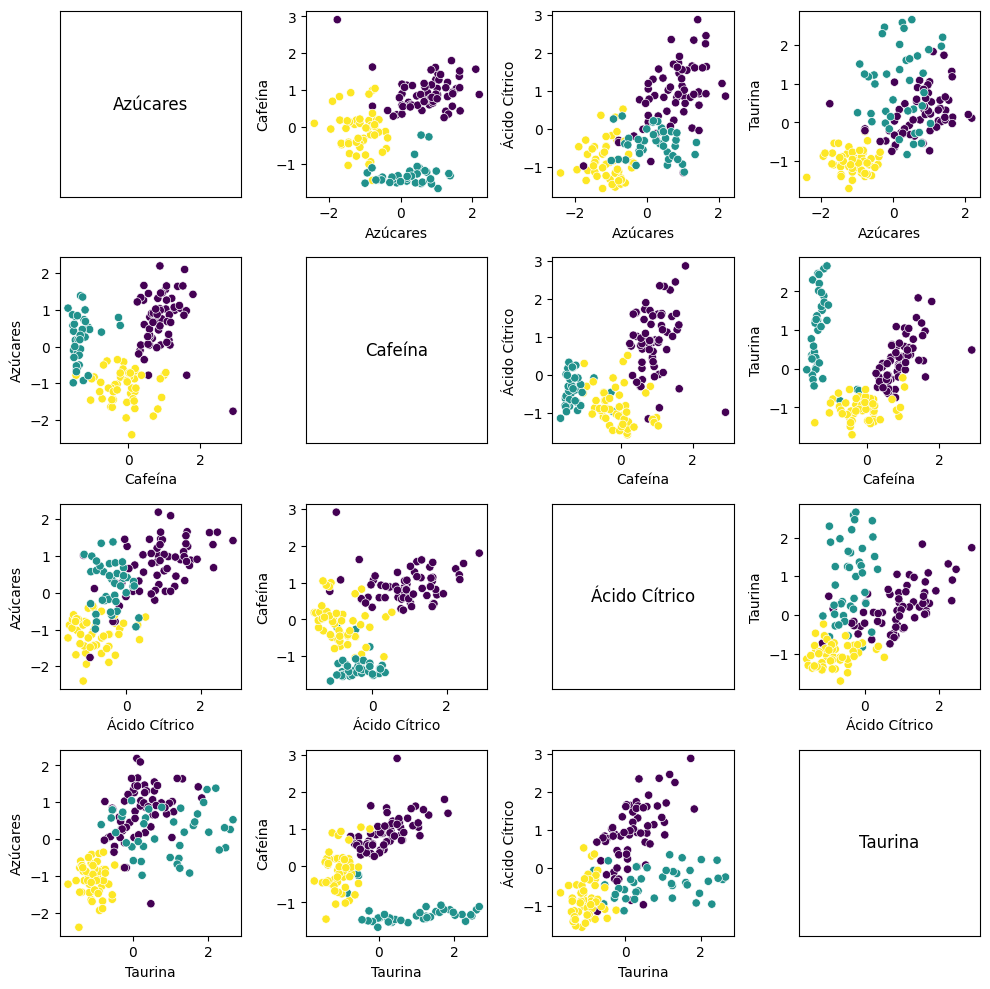

In [46]:
#Eliminamos las labels de DBSCAN pues finalmente no las utilizaremos
data_scaled_new = data_scaled_new.drop(columns=['DBSCAN_Labels'])

#Generamos los scatterplots usando ahora las etiquetas del clustering jerárquico
columns = data_scaled_new.columns.drop('Hierarchical_Labels')
fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(10, 10))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i != j:
            sns.scatterplot(x=data_scaled_new[col1], y=data_scaled_new[col2], hue=data_scaled_new['Hierarchical_Labels'], ax=axes[i, j], palette='viridis', legend=False)
            axes[i, j].set_xlabel(col1)
            axes[i, j].set_ylabel(col2)
        else:
            axes[i, j].text(0.5, 0.5, col1, horizontalalignment='center', verticalalignment='center', fontsize=12)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [47]:
dataset_new_experiments = pd.read_csv("./data/new_experiments.csv", sep="|")
dataset_new_experiments.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583


In [48]:
dataset_new_experiments

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [49]:
#Adaptamos el dataset de la manera seguida para entrenar los modelos
dataset_new_experiments = scaler.transform(dataset_new_experiments)
dataset_new_experiments = pd.DataFrame(dataset_new_experiments, columns=data.columns)
dataset_new_experiments.drop(columns=['Vitamínas del grupo B'], inplace=True)

Para predecir los nuevos datos, al igual que se hizo en los vídeos, vamos a usar KNN.  
Para ello, vamos a entrenar el modelo con los datos del dataset ya predicho y ahora vamos a generar las labels prediciondolas con este modelo

In [50]:
from sklearn.neighbors import KNeighborsClassifier

#Entrenamos el modelo KNN con los datos originales y sus etiquetas de clustering jerárquico
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data_scaled_new.drop(columns=['Hierarchical_Labels']), data_scaled_new['Hierarchical_Labels'])

#Predecimos las etiquetas para el nuevo conjunto de experimentos
knn_labels = knn.predict(dataset_new_experiments)

#Añadimos las etiquetas como una nueva columna en el dataframe
dataset_new_experiments['Hierarchical_Labels'] = knn_labels

dataset_new_experiments.head()

,Azúcares,Cafeína,Ácido Cítrico,Taurina,Hierarchical_Labels
0,1.429694,1.277151,2.145830,0.833162,0
1,0.584303,0.522377,0.230979,-0.667043,0
2,-1.662022,-0.367870,-0.291253,-1.001454,2
3,-0.297319,-0.793640,-1.266086,-0.722778,2
4,-0.925324,-1.548415,-0.164651,-0.513771,2


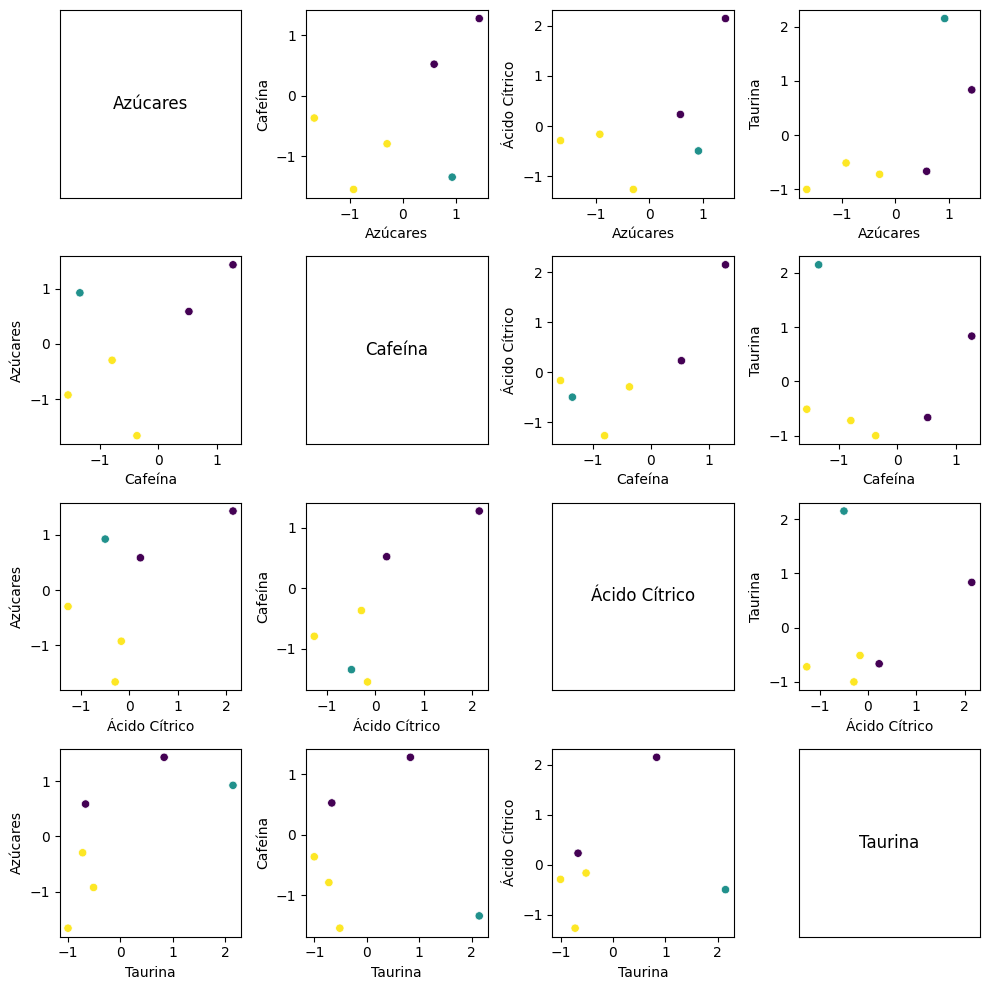

In [51]:
#Generamos los scatterplots usando ahora las etiquetas del clustering jerárquico predcihas con KNN en el nuevo dataset
columns = dataset_new_experiments.columns.drop('Hierarchical_Labels')
fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(10, 10))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i != j:
            sns.scatterplot(x=dataset_new_experiments[col1], y=dataset_new_experiments[col2], hue=dataset_new_experiments['Hierarchical_Labels'], ax=axes[i, j], palette='viridis', legend=False)
            axes[i, j].set_xlabel(col1)
            axes[i, j].set_ylabel(col2)
        else:
            axes[i, j].text(0.5, 0.5, col1, horizontalalignment='center', verticalalignment='center', fontsize=12)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

Parece cuadrar gráifcamente con los valores mostrados para el dataset original

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

In [52]:
result = pd.read_csv("./data/power_results.csv")
result.head()

,class
0,1
1,1
2,1
3,1
4,1


In [53]:
result.shape

(159, 1)

In [54]:
data_scaled_new.shape

(153, 5)

In [55]:
dataset_new_experiments.shape

(6, 5)

Hay que añadir los puntos del apartado 2 al final del dataset original

In [56]:
dataset_new_experiments

,Azúcares,Cafeína,Ácido Cítrico,Taurina,Hierarchical_Labels
0,1.429694,1.277151,2.145830,0.833162,0
1,0.584303,0.522377,0.230979,-0.667043,0
2,-1.662022,-0.367870,-0.291253,-1.001454,2
3,-0.297319,-0.793640,-1.266086,-0.722778,2
4,-0.925324,-1.548415,-0.164651,-0.513771,2
5,0.922459,-1.345206,-0.496981,2.147582,1


In [57]:
full_data = pd.concat([data_scaled_new, dataset_new_experiments], ignore_index=True)

In [58]:
full_data["Results"] = result["class"]
full_data.head()

,Azúcares,Cafeína,Ácido Cítrico,Taurina,Hierarchical_Labels,Results
0,1.465925,0.957824,0.927289,0.317612,0,1
1,0.221992,0.667526,0.879813,-0.267608,0,1
2,0.173684,1.132002,1.307094,0.336190,0,1
3,1.635003,1.373917,2.240782,1.320844,0,1
4,0.270301,0.599790,-0.117176,-0.295475,0,1


In [61]:
#Sumamos uno a Hierarchical_Labels, pues los resultados son 1,2,3 y los labels son 0,1,2
full_data["Hierarchical_Labels"] = full_data["Hierarchical_Labels"] + 1

In [62]:
contingency_matrix = pd.crosstab(full_data["Hierarchical_Labels"], full_data["Results"])
print(contingency_matrix)

Results               1   2   3
Hierarchical_Labels            
1                    58   7   0
2                     0   3  38
3                     0  52   1


Parece que lo que el clustering considera como label = 2, el resultado real es 3 y viceversa. Lo cambiamos y volvemos a ver la matriz de contingencias

In [63]:
full_data["Hierarchical_Labels"] = full_data["Hierarchical_Labels"].replace({2: 3, 3: 2})

In [65]:
contingency_matrix = pd.crosstab(full_data["Hierarchical_Labels"], full_data["Results"])
contingency_matrix

Results,1,2,3
Hierarchical_Labels,,,
1,58,7,0
2,0,52,1
3,0,3,38


Aunque no sea un problema de clasificacion, dado que tenemos los resultados, podemos ver el classification report

In [66]:
from sklearn.metrics import classification_report

report = classification_report(full_data["Results"], full_data["Hierarchical_Labels"])
print(report)

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        58
           2       0.98      0.84      0.90        62
           3       0.93      0.97      0.95        39

    accuracy                           0.93       159
   macro avg       0.93      0.94      0.93       159
weighted avg       0.94      0.93      0.93       159



Se puede observar a partir de la matriz de contingencias que el clustering ha funcionado bastante bien, habiendo clasificado erroneamente tan solo 10 datos del total, con una precisión del 93%